In [1]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
from scopus_handler import ScopusHandler

In [2]:
subject = "comp"
df4 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_2014_%s.csv" % subject)
df4_sources = pd.read_csv("scopus/source_2013_%s.csv" % subject, header=0)
scopus_2014 = ScopusHandler(df4, df4_sources, "scopus_videos_2014_%s" % subject, verbose=True)
scopus_2014.db_handler.sql_handler.list_where_clauses = []
df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_2019_%s.csv" % subject)
df3_sources = pd.read_csv("scopus/source_2018_%s.csv" % subject, header=0)
scopus_2019 = ScopusHandler(df3, df3_sources, "scopus_videos_2019_%s" % subject, verbose=True)
scopus_2019.db_handler.sql_handler.list_where_clauses = []

[+]Duplicates have been dropped from df_scopus.	Before: 9598	After: 9336
[+]Duplicates have been dropped from df_scopus.	Before: 14533	After: 14330


In [3]:
def get_list_meters(scopus_handler, metric="Cited by", where=None):
    _list_dois = list(map(lambda _row: _row[2], scopus_handler.set_target_videos(where=where).list_target_videos))
    return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)

metric = "Cited by"

_2014_w_videos_cit_exp = get_list_meters(scopus_2014, metric=metric, where=("content", ["paper_explanation", "paper_application", "paper_assessment"], "in"))
_2014_w_videos_cit_news = get_list_meters(scopus_2014, metric=metric, where=("content", ["news"], "in"))
_2014_w_videos_cit_sup = get_list_meters(scopus_2014, metric=metric, where=("content", ["paper_linked_supplementary", "paper_supplementary"], "in"))
_2014_w_videos_cit_ref = get_list_meters(scopus_2014, metric=metric, where=("content", ["paper_reference"], "in"))
_2019_w_videos_cit_exp = get_list_meters(scopus_2019, metric=metric, where=("content", ["paper_explanation", "paper_application", "paper_assessment"], "in"))
_2019_w_videos_cit_news = get_list_meters(scopus_2019, metric=metric, where=("content", ["news"], "in"))
_2019_w_videos_cit_sup = get_list_meters(scopus_2019, metric=metric, where=("content", ["paper_linked_supplementary", "paper_supplementary"], "in"))
_2019_w_videos_cit_ref = get_list_meters(scopus_2019, metric=metric, where=("content", ["paper_reference"], "in"))

	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_application', 'paper_assessment')"]
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_application', 'paper_assessment')", 'idx IN (1, 2, 3, 4, 6, 7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 33, 34, 36, 38, 39, 41, 43, 46, 48, 50, 51, 52, 53, 55, 56, 57, 58, 62, 64, 65, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 91, 92, 95, 96, 97, 98, 99, 101, 102, 103, 105, 106, 107, 109, 111, 114, 115, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 131, 132, 135, 137, 138, 142, 143, 144, 145, 147, 148)']
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp` WHERE (content IN ('paper_explanation', 'paper_application', 'paper_assessment') AND idx IN (1, 2, 3, 4, 6, 7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 27,

<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)
<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)


# Total subjects: 43	# subjects w/ videos: 17	Ratio: 0.395
# Total journals: 133	# journals w/ videos: 24	Ratio: 0.180
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_application', 'paper_assessment')"]
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_application', 'paper_assessment')", 'idx IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80)']
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_application', 'paper_assessment') AND idx IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,

<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)
<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)
<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)


# Total DOIs: 14330	# DOIs w/ videos: 27	Ratio: 0.002
# Total videos: 34	# Target videos: 34	Ratio: 1.000
# Total subjects: 46	# subjects w/ videos: 14	Ratio: 0.304
# Total journals: 133	# journals w/ videos: 18	Ratio: 0.135
	Command set: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_reference')"]
	Current list_where_clauses: ["content IN ('paper_reference')", 'idx IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80)']
	sql: SELECT `idx`, `videoId`, `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_reference') AND idx IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25

<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)
<ipython-input-3-51819caefaa4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return np.log10(scopus_handler.df_scopus[scopus_handler.df_scopus.DOI.isin(_list_dois)][scopus_handler.df_scopus[metric] != "None"][metric].dropna().astype(int).values)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f783c8a1280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f783c8a1940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f783c892ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f783c8ac040>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f783c8ac3a0>,
 'means': []}

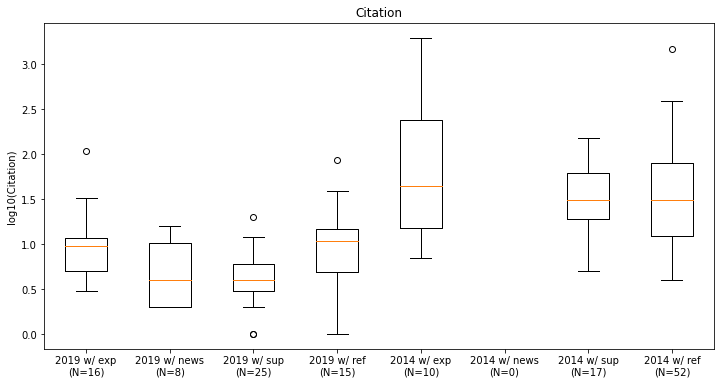

In [5]:
plt.figure(figsize=(12, 6))
plt.title("Citation")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_w_videos_cit_exp,
    _2019_w_videos_cit_news,
    _2019_w_videos_cit_sup,
    _2019_w_videos_cit_ref,
    _2014_w_videos_cit_exp,
    _2014_w_videos_cit_news,
    _2014_w_videos_cit_sup,
    _2014_w_videos_cit_ref
],
    labels=[
        "2019 w/ exp\n(N=%s)"%len(_2019_w_videos_cit_exp),
        "2019 w/ news\n(N=%s)"%len(_2019_w_videos_cit_news),
        "2019 w/ sup\n(N=%s)"%len(_2019_w_videos_cit_sup),
        "2019 w/ ref\n(N=%s)"%len(_2019_w_videos_cit_ref),
        "2014 w/ exp\n(N=%s)"%len(_2014_w_videos_cit_exp),
        "2014 w/ news\n(N=%s)"%len(_2014_w_videos_cit_news),
        "2014 w/ sup\n(N=%s)"%len(_2014_w_videos_cit_sup),
        "2014 w/ ref\n(N=%s)"%len(_2014_w_videos_cit_ref),
    ]
)